In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [374]:
# Use AustraliaFiltered.xlsx dataset generated earlier

df = pd.read_excel(r'E:\DataScience\weekday2019_09_05\Assignments\Megha\AustraliaFiltered.xlsx' )
df.head()
df.drop(columns = 'Unnamed: 0' , inplace = True)


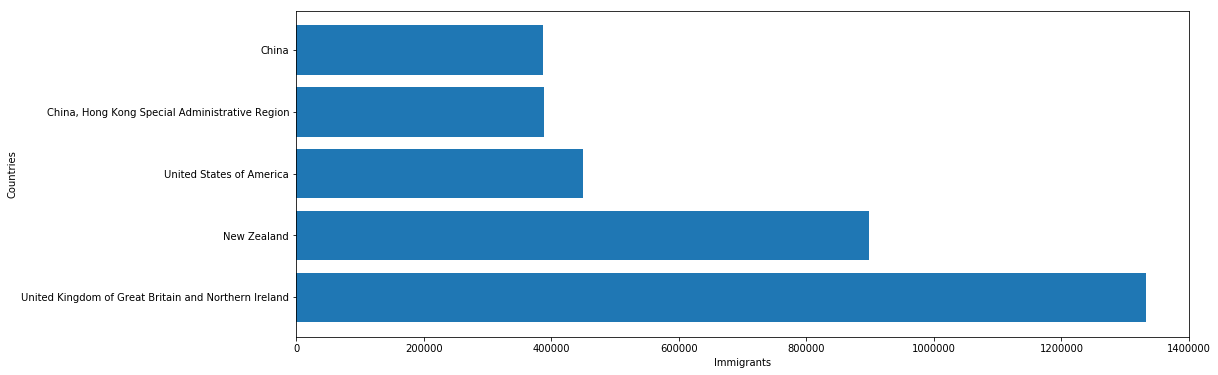

In [98]:
# Plot bar chart of total no of immigrants for countires top 5 countires having max no of total immigrants

#First approach
# df_top_c = df.sort_values(by = 'Total', ascending = False).head(5)
# df_top_c
#Countries are unique here

#Using matplot
top_im = df.nlargest(5, 'Total')
plt.figure(figsize = (16,6))
plt.barh(top_im.Country,  top_im.Total)
plt.ylabel('Countries')
plt.xlabel('Immigrants')
#How to customize the overlapping over xaxis of country name?
plt.show()




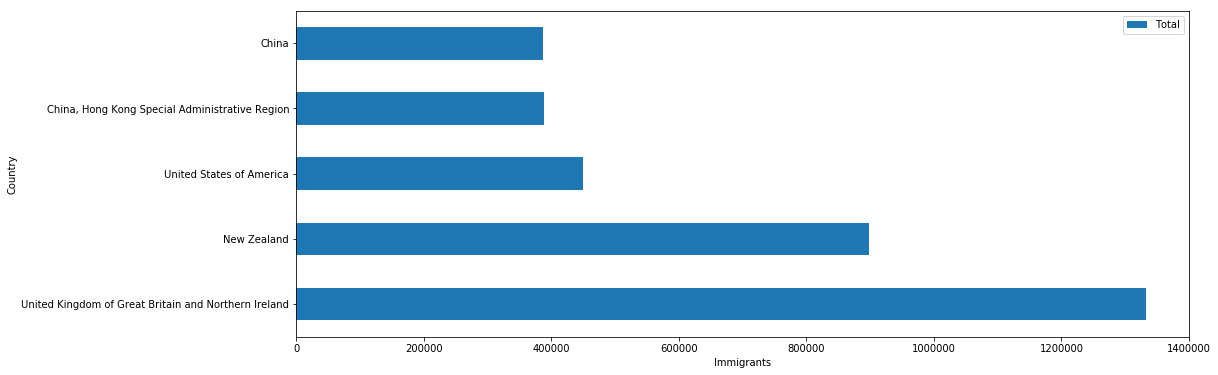

In [507]:
# #Using pandas

top_im[['Country', 'Total']].set_index('Country').plot(kind = 'barh', figsize = (16,6))
plt.xlabel('Immigrants')
plt.show()






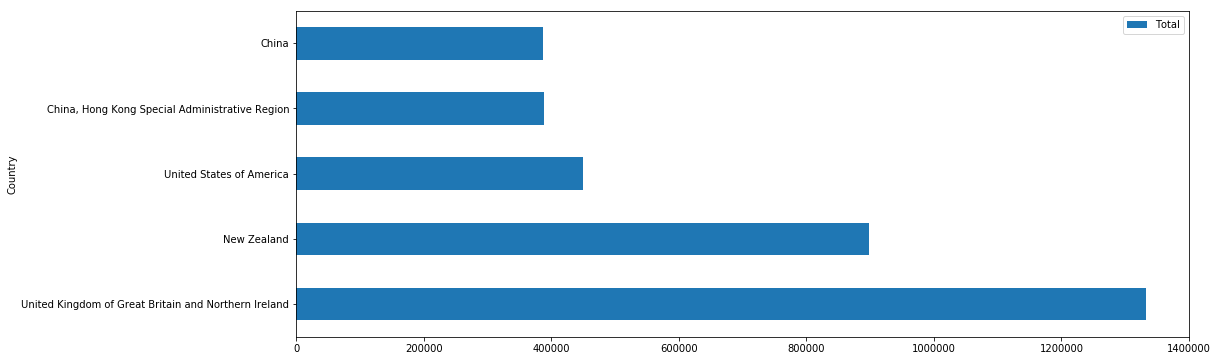

In [506]:
#Using pivot

pivot_top = pd.pivot_table(df , index = 'Country' , values = 'Total').nlargest(5, 'Total')
pivot_top.plot(kind = 'barh', figsize = (16,6))
plt.show()


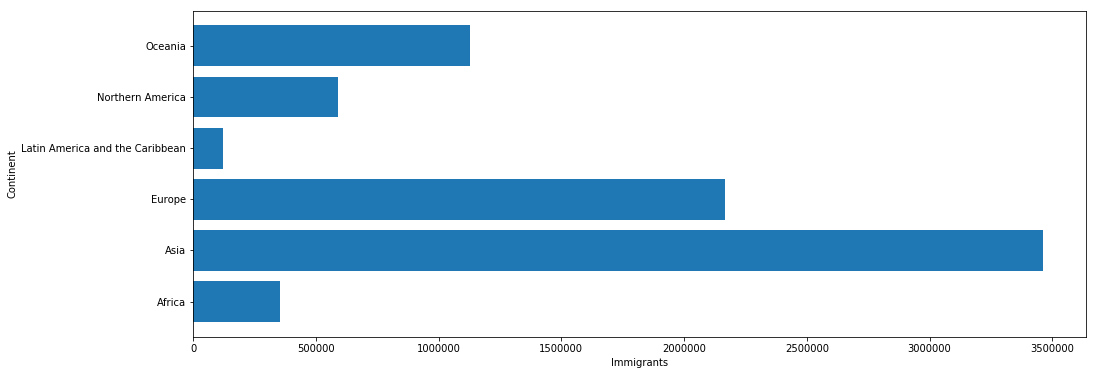

In [196]:
# Find total immigrants from each category by area name and plot barchart for each area

# df.groupby( by = 'AreaName').sum()

#Using Matplotlib

plt.figure(figsize = (16,6))
area_im= df.groupby(by= 'AreaName').sum()
plt.barh(area_im.index , area_im.Total )
plt.xlabel('Immigrants')
plt.ylabel('Continent')
plt.show()



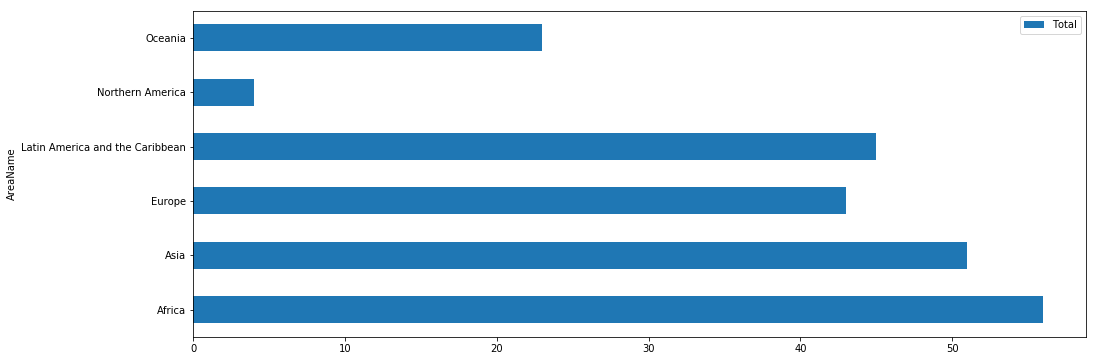

In [146]:
#Using Pandas
plt.figure(figsize = (16,6))
area_im.plot(kind = 'barh', label = 'Total')
plt.legend()
plt.show()

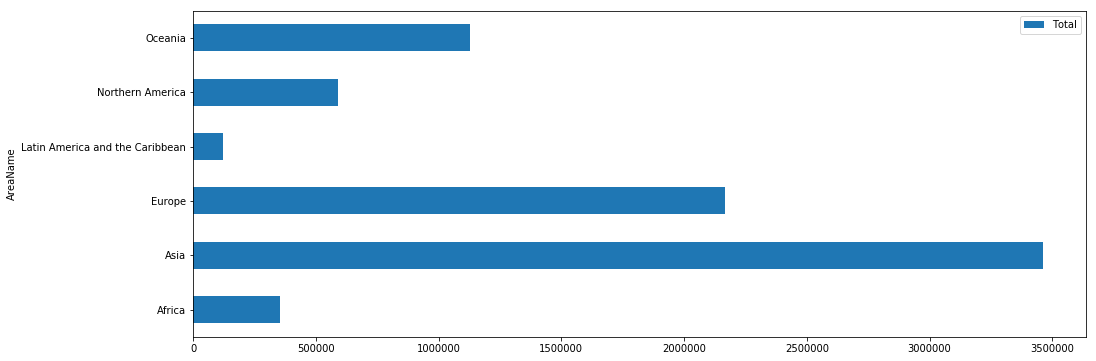

In [505]:
#Using Pivot

pivot_cat = df.pivot_table(values = 'Total'  , index = 'AreaName', aggfunc = np.sum)
pivot_cat.plot(kind = 'barh', figsize = (16,6))
plt.legend()
plt.show()


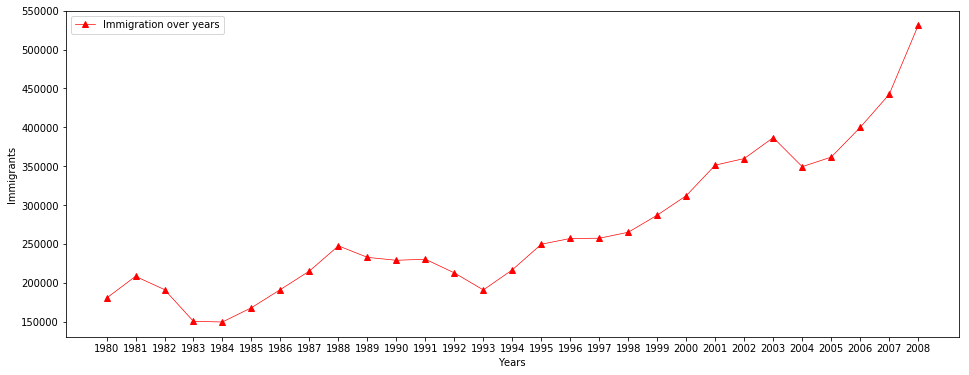

In [413]:
# Plot total immigration trend(immigration of world over the years i.e. year vs Total count for that year) using line plot.

plt.figure(figsize = (16,6))

#Using matplotlib

trend_im = df.loc[:, '1980':'2008'].sum(axis = 0)
plt.plot(trend_im.index, trend_im.values , 'r--' , marker = '^', linestyle = '-' , linewidth = 0.69 , 
         label = 'Immigration over years')
plt.xlabel('Years')
plt.ylabel('Immigrants')
plt.legend()
plt.show()




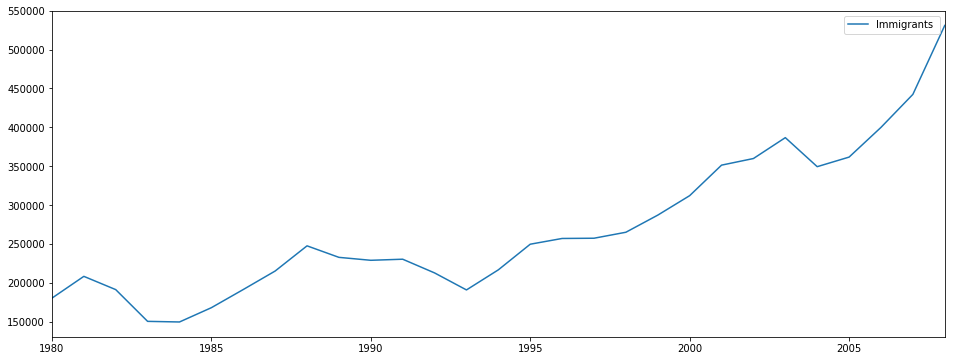

In [504]:
#Using pandas


trend_df = pd.DataFrame({'Immigrants ': trend_im})
trend_df.plot.line(figsize = (16,6))
plt.show()


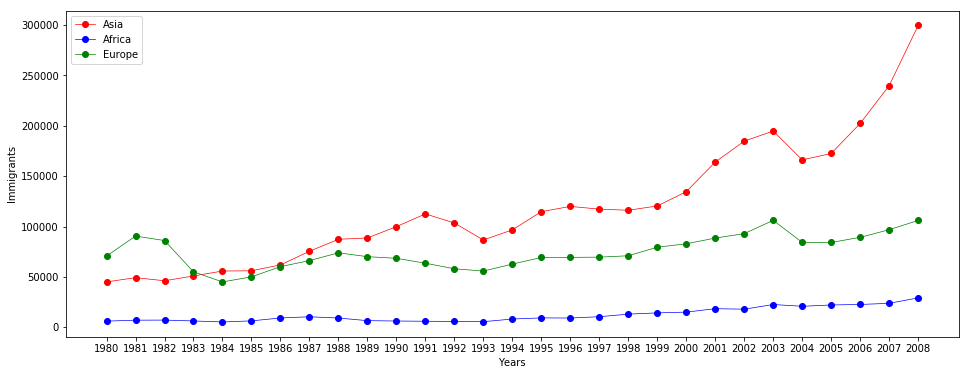

In [428]:
# Compare Immigration Trend for Asia, Africa and Europe AreaName (Use Line plot).

#Using matplotlib
plt.figure(figsize = (16,6))
df1 = df.groupby('AreaName')
asia = df1.get_group('Asia').sum()['1980':'2008']
africa = df1.get_group('Africa').sum()['1980':'2008']
europe = df1.get_group('Europe').sum()['1980':'2008']
plt.plot(asia.index, asia.values ,  'ro' , linestyle = '-' , linewidth = 0.69 , 
         label = 'Asia' , c = 'r')
plt.plot(africa.index, africa.values ,  'ro', linestyle = '-' , linewidth = 0.69 , 
         label = 'Africa' , c = 'b')
plt.plot(europe.index, europe.values ,  'ro' , linestyle = '-' , linewidth = 0.69 , 
         label = 'Europe'  , c = 'g')
plt.xlabel('Years')
plt.ylabel('Immigrants')

plt.legend()
plt.show()

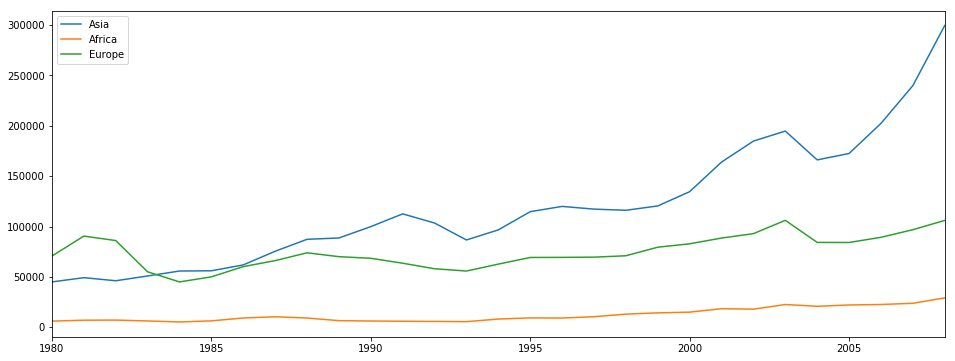

In [503]:
#Using Pandas

df_new = pd.DataFrame({'Asia':asia , 'Africa': africa , 'Europe': europe})
df_new.plot.line(figsize = (16,6))
plt.show()

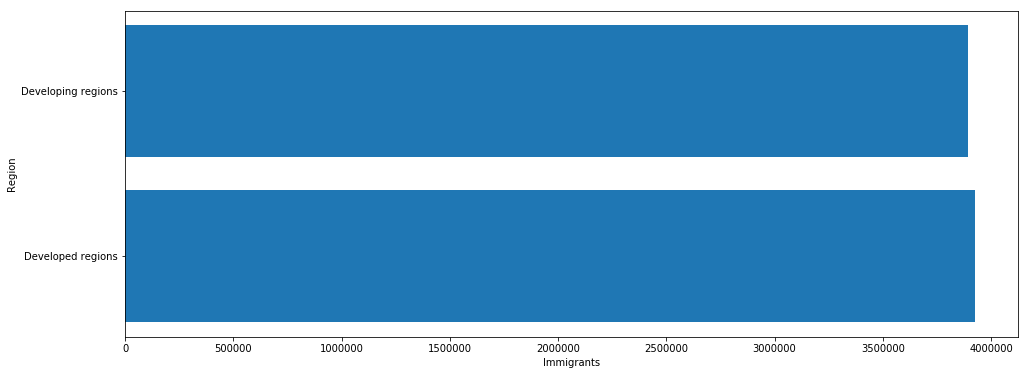

In [324]:
# Plot Total Immigrants based on DevelopmenRegion

#Using matlplot
plt.figure(figsize = (16,6))
df1 = df.groupby('DevName').sum()
plt.barh(df1.index, df1.Total)
plt.ylabel('Region')
plt.xlabel('Immigrants')
plt.show()

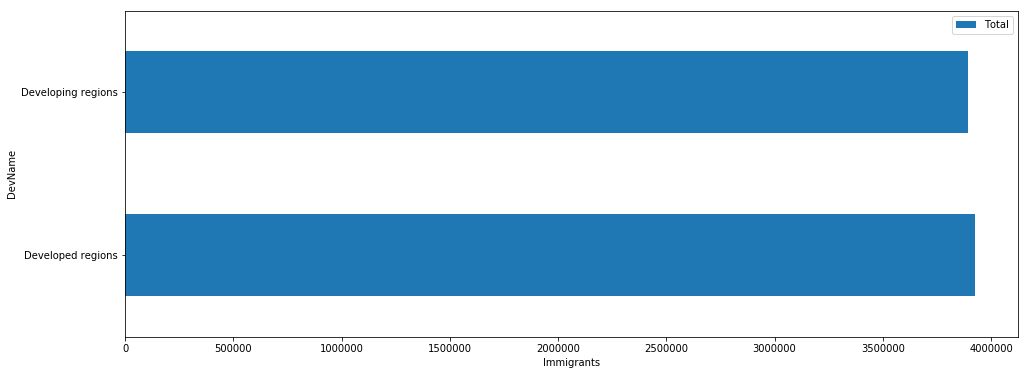

In [502]:
#Using Pandas

# df1 = df.pivot_table( values = 'Total' , index = 'DevName' , aggfunc = np.sum)

# or

df1 = df.groupby('DevName').sum()
devname = pd.DataFrame(df1.Total)
devname.plot(kind= 'barh', figsize = (16,6))
plt.xlabel('Immigrants')
plt.legend()
plt.show()



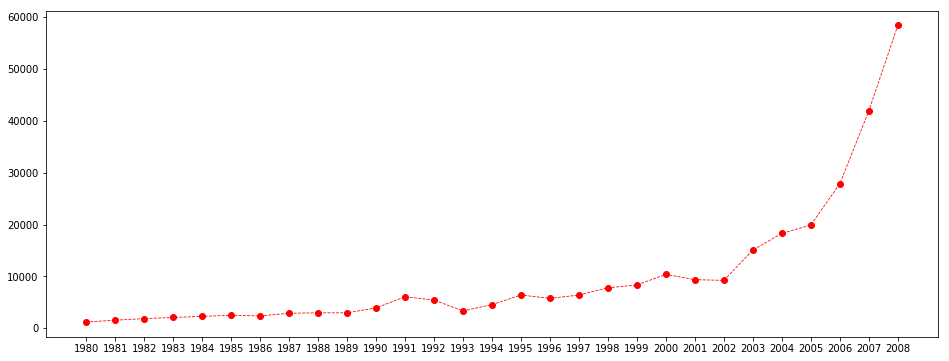

In [412]:
# Plot immigration trend for India using line plot

#Using matplotlib
plt.figure(figsize = (16,6))
df1 = df[df.Country == 'India'].loc[:,'1980':'2008']
plt.plot( df1.columns, df1.loc[95] , 'ro' , linewidth = 0.8 , linestyle = '--')
plt.show()


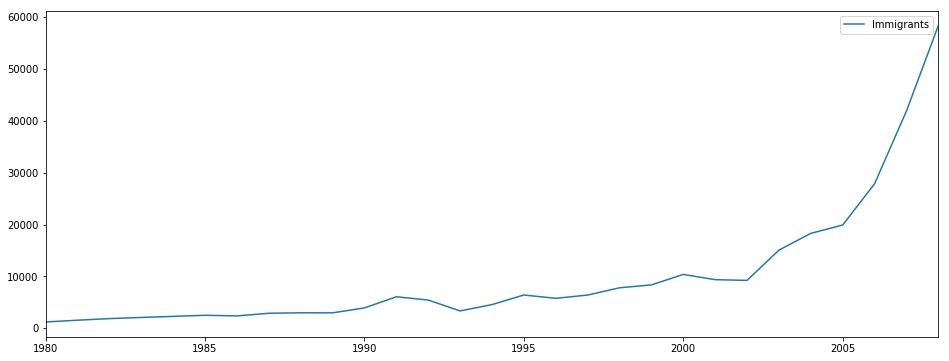

In [423]:
#Using Pandas
plt.figure(figsize = (16,6))
df1 = df[df['Country'] == 'India'].sum()['1980':'2008']
df1.plot.line(label ='Immigrants')
plt.legend()
plt.show()


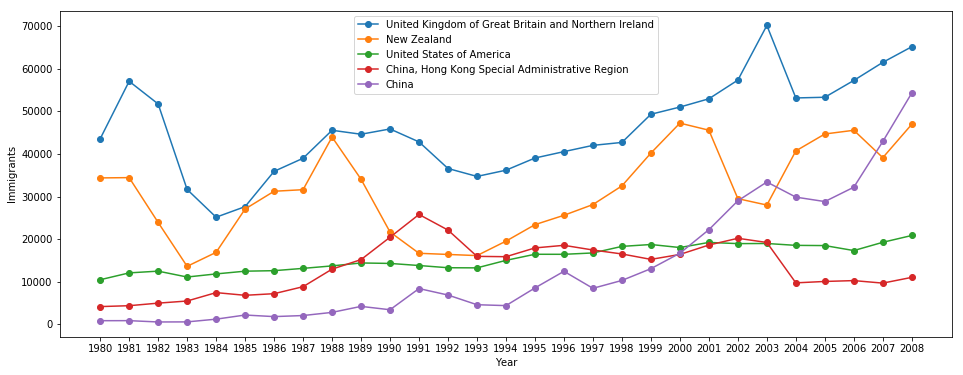

In [636]:
# Plot immigration Trend(year vs count) for the coutries with top 5 total immigrants. Use Line plot

#Using matplotlib
plt.figure(figsize = (16,6))
df1 = df.groupby('Country').sum().nlargest(5, 'Total').loc[:,'1980':'2008']
i = 0
while i < 5:
    plt.plot(df1.columns, df1.iloc[i].values  , marker = 'o', label = df1.index[i] ) #We can write df1.iloc[i] also without .values
    i += 1
plt.legend()
plt.ylabel('Immigrants')
plt.xlabel('Year')
plt.show()
    


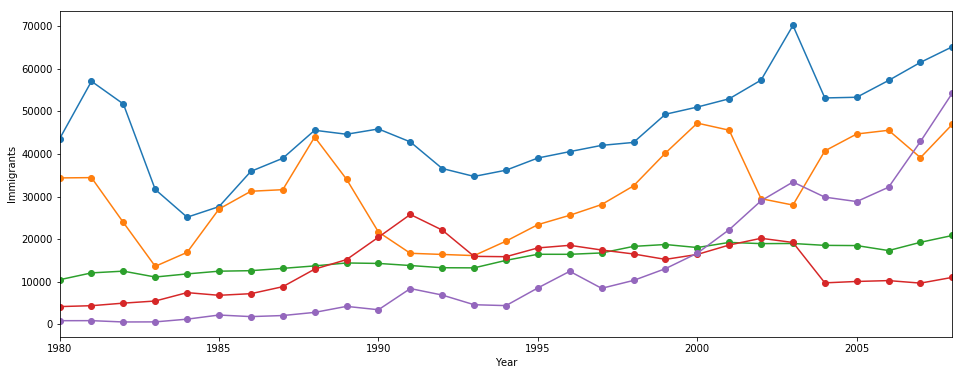

In [632]:

#Using Pandas

#Used Series
#First Approach

df_p_idx = df1.columns
i = 0
plt.ylabel('Immigrants')
plt.xlabel('Year')
while ( i < 5):
#     s = pd.Series(dict(zip(df_p_idx , df1.iloc[i]))) Alternate Approach
    s = pd.Series(df1.iloc[i])
    s.plot.line(label = df1.index[i] , figsize = (16,6), marker = 'o')
    plt.plot()
    i += 1
    


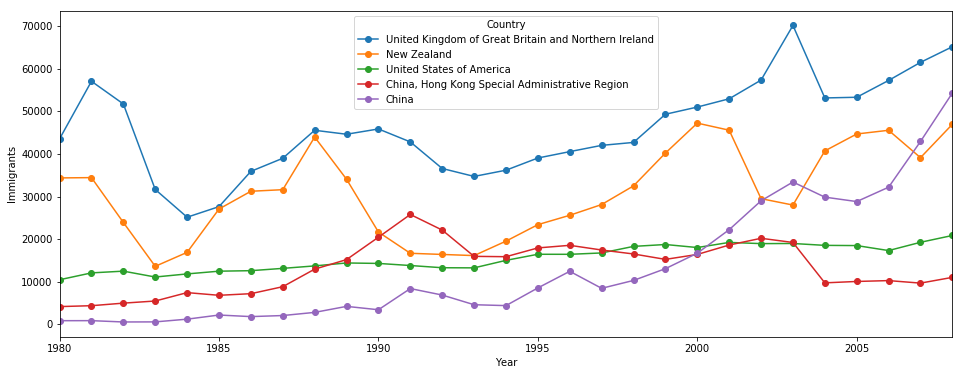

In [613]:
#Second Approach 

df_transpose = df1.T
df_transpose.plot.line(figsize = (16,6) , marker = 'o')
plt.ylabel('Immigrants')
plt.xlabel('Year')
plt.show()

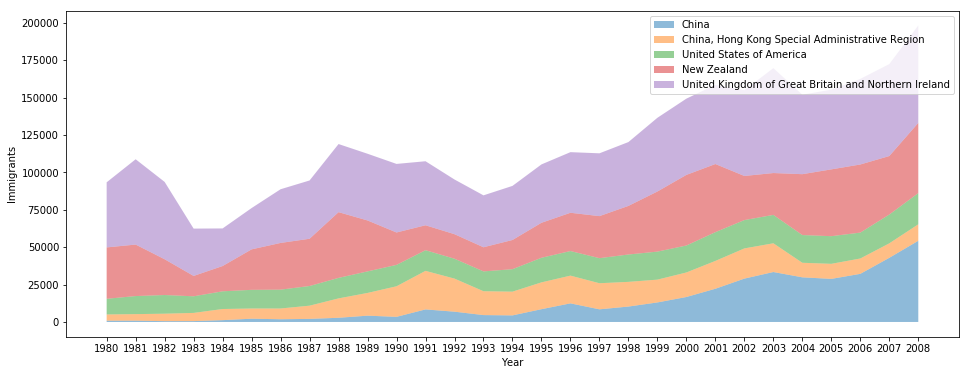

In [548]:
# For the above use area plot with alpha = 0.5
#Using matplotlib
plt.figure(figsize = (16,6))
plt.fill_between(df1.iloc[4].index , df1.iloc[4].values , alpha = 0.5 , label = df1.index[4])
plt.fill_between(df1.iloc[4].index , df1.iloc[4].values , df1.iloc[4].values + df1.iloc[3].values, alpha = 0.5, label = df1.index[3])
plt.fill_between(df1.iloc[4].index , df1.iloc[4].values + df1.iloc[3].values , df1.iloc[4].values + df1.iloc[3].values + df1.iloc[2].values, alpha = 0.5, label = df1.index[2])
plt.fill_between(df1.iloc[4].index , df1.iloc[4].values + df1.iloc[3].values + df1.iloc[2].values , df1.iloc[4].values + df1.iloc[3].values + df1.iloc[2].values +
                 df1.iloc[1].values, alpha = 0.5, label = df1.index[1])
plt.fill_between(df1.iloc[4].index , df1.iloc[4].values + df1.iloc[3].values + df1.iloc[2].values +
                 df1.iloc[1].values, df1.iloc[4].values + df1.iloc[3].values + df1.iloc[2].values +
                 df1.iloc[1].values  + df1.iloc[0].values, alpha = 0.5, label = df1.index[0])
plt.legend()
plt.ylabel('Immigrants')
plt.xlabel('Year')
plt.show()

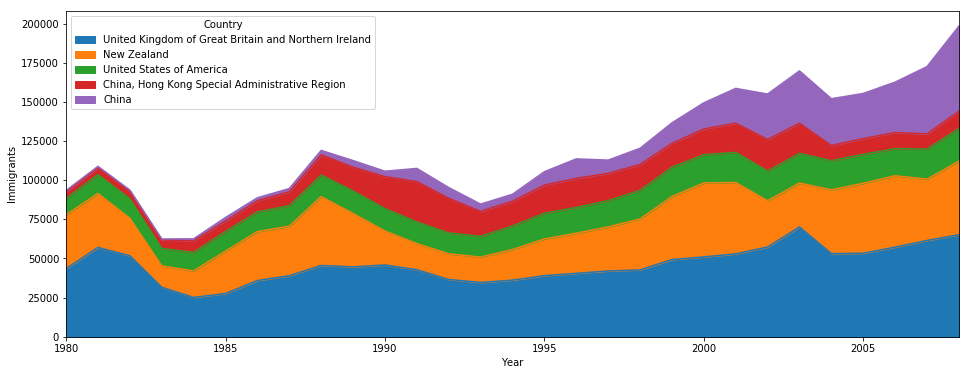

In [610]:
df_transpose = df1.T
df_transpose.plot(kind = 'area' , figsize = (16,6))
plt.ylabel('Immigrants')
plt.xlabel('Year')
plt.show()

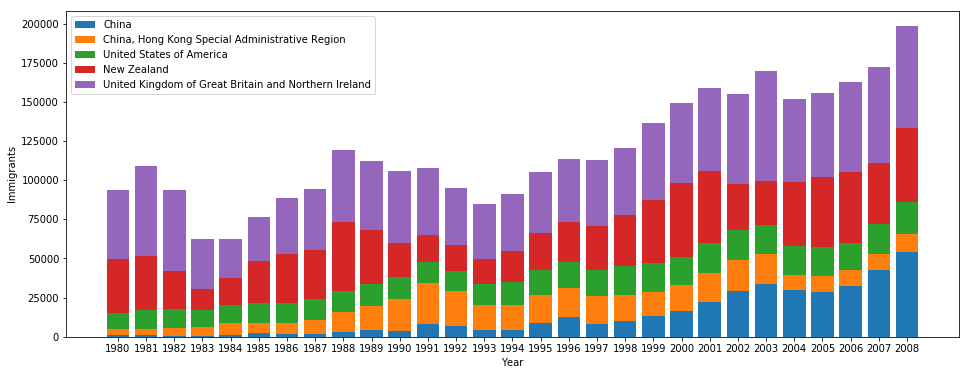

In [639]:
# Compare Immigration Trend for top-5 countires using stacked area plot

#Using matplotlib
plt.figure(figsize = (16,6))
plt.bar(df1.columns , df1.iloc[4].values , label = df1.index[4])
plt.bar(df1.columns , df1.iloc[3].values , bottom =df1.iloc[4].values ,  label = df1.index[3])
plt.bar(df1.columns , df1.iloc[2] ,  bottom =df1.iloc[4].values + df1.iloc[3].values , label = df1.index[2])
plt.bar(df1.columns , df1.iloc[1] ,  bottom =df1.iloc[4].values + df1.iloc[3].values + df1.iloc[2].values, label = df1.index[1])
plt.bar(df1.columns , df1.iloc[0] ,  bottom =df1.iloc[4].values+ df1.iloc[3].values + df1.iloc[2].values + df1.iloc[1].values, label = df1.index[0])
plt.legend()
plt.ylabel('Immigrants')
plt.xlabel('Year')
plt.show()



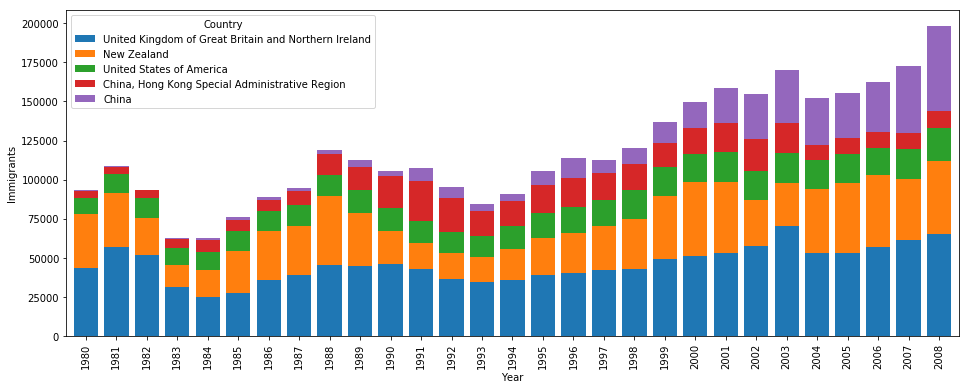

In [646]:
#Using Pandas

df_transpose.plot(kind = 'bar', stacked = True , figsize = (16,6), width = 0.8)
plt.ylabel('Immigrants')
plt.xlabel('Year')
plt.show()